In [2]:
# Исследование распространения лазерного пучка методами Фурье-оптики.
# вариант 7
# λ, мкм Апертуры Размер сетки, мкм*мкм a, мкм -1 b f, м

# I. Диафрагма, выделяющая центральный пик в Фурье-спектре.
# II. Апертура, закрывающая центральный пик в Фурье-спектре.
# III. Горизонтальная щель
# IV. Вертикальная щель

"""
w0 = 300 * 10**-6
#Две круглые апертуры на расстоянии 3r0
r0 = 300 * 10**-6
L1 = 1
f = 0.08
λ = 0.512 * 10**-6 
"""

w0 = 300
#Две круглые апертуры на расстоянии 3r0
r0 = 300
L1 = 1 * 10**6
f = 0.08 * 10**6
λ = 0.512 
r_0 = 300

N = 1024

dx = 4*2000 /(N - 1)
dy = dx
X = [i*dx - 4000 for i in range(N-1)]
Y = [i*dy - 4000 for i in range(N-1)]

λ2 = 1064 * 10**-6 
Aperturs = [1,2,4] 
RazmerX = 800 * 10**-6 
RazmerY = 800 * 10**-6 
a = 0.010 * 10**6 
b = 0.9 
f = 0.25

import math
import numpy as np
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from decimal import *

<class 'bool'>


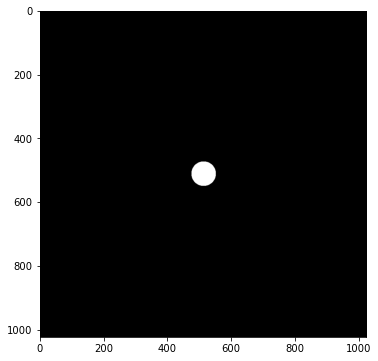

In [2]:

def k(x, y):
    return np.exp(Decimal(-2) * (Decimal(x)**Decimal(2) + Decimal(y)**Decimal(2)) / (Decimal(w0)**Decimal(2)))
def k_(x, y):
    return np.exp((-2) * ((x)**(2) + (y)**(2)) / ((w0)**(2)))

def k_full(x, y):
    return x**2 + y**2 < r_0**2




U0 = [[k_full(X[i], Y[j]) for j in range(N-1)] for i in range(N-1)]

#U0 = np.interp(U0, (np.min(U0), np.max(U0)), (0, 255))
print(type(U0[0][0]))
fig, ax = plt.subplots()

ax.imshow(U0, cmap='gray')

fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

#plt.show()

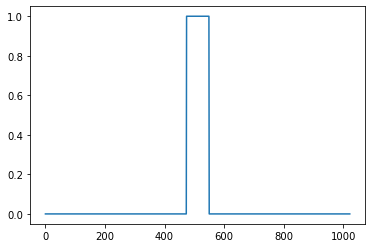

In [3]:
plt.plot(U0[math.floor(N/2)])

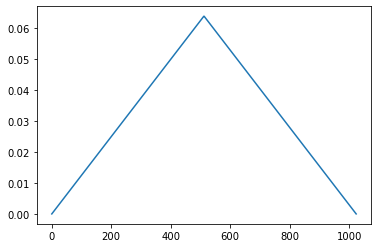

In [7]:
α = [0] * (N)
for i in range(math.floor(N/2)):
    α[i] = (i / (N * dx))
    α[N - i - 1] = α[i]
plt.plot(α)

In [8]:
k = 2 * 3.141592653589793638 / λ
2.718281828459045

def H0(z):
    return [[np.exp(-1j * k * z *math.sqrt(1 - (α[i] * λ)**2 - (α[j] * λ)**2)) if ((α[i] * λ)**2 + (α[j] * λ)**2 ) < 1 
             else 0 for j in range(N-1)] for i in range(N-1)]

In [9]:
H0_L1 = H0(L1)

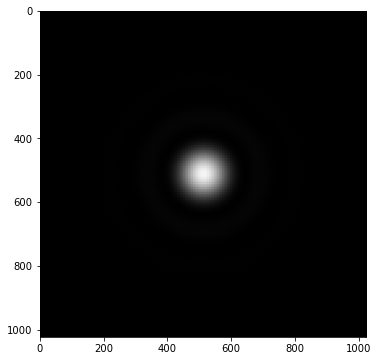

In [7]:
F0 = np.fft.fft2(U0)
H0_L1 = H0(L1)
A0 = [[F0[i][j] * H0_L1[i][j] for j in range(N-1)] for i in range(N-1)]
U1 = np.fft.ifft2(A0)
I1 = [[np.abs(U1[i][j])**2 for j in range(N-1)] for i in range(N-1)]

fig, ax = plt.subplots()
ax.imshow(I1, cmap='gray')
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

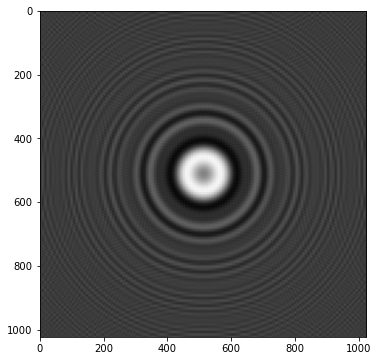

In [8]:

fig, ax = plt.subplots()
ax.imshow(np.real(U1), cmap='gray')
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

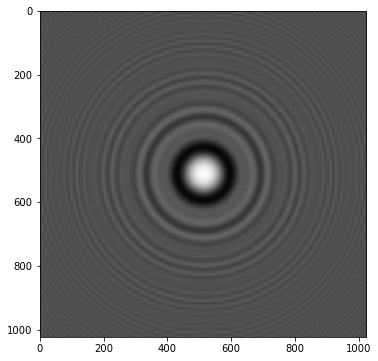

In [9]:

fig, ax = plt.subplots()
ax.imshow(np.imag(U1), cmap='gray')
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

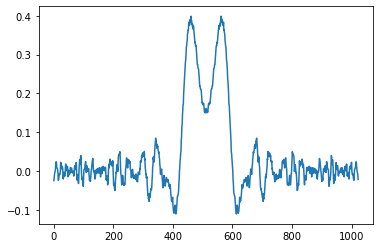

In [10]:
plt.plot(np.real(U1)[math.floor(N/2)])

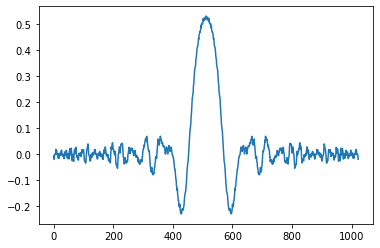

In [11]:
plt.plot(np.imag(U1)[math.floor(N/2)])

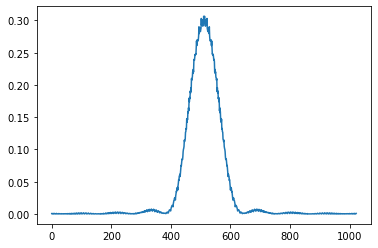

In [12]:
plt.plot(I1[math.floor(N/2)])

In [13]:
def B(x, y):
    return np.exp(1j * k / (2 * f) * (x**2 + y **2) )

U1_2 = [[U1[i][j] * B(X[i], Y[j]) for j in range(N-1)] for i in range(N-1)]
H1_f = H0(f)
F1 = np.fft.fft2(U1_2)
A1 = [[F1[i][j] * H1_f[i][j] for j in range(N-1)] for i in range(N-1)]
U2 = np.fft.ifft2(A1)
I2 = [[np.abs(U2[i][j])**2 for j in range(N-1)] for i in range(N-1)]

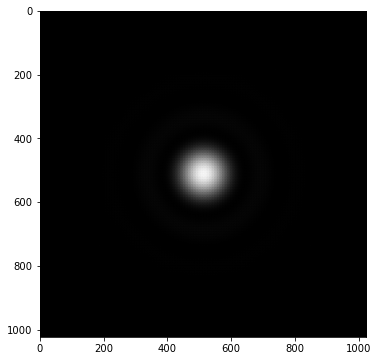

In [14]:

fig, ax = plt.subplots()
ax.imshow(I2, cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

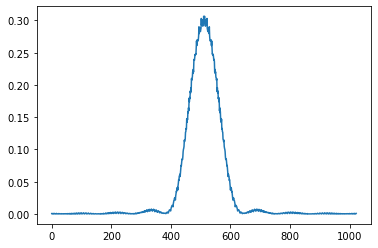

In [15]:
plt.plot(I1[math.floor(N/2)])

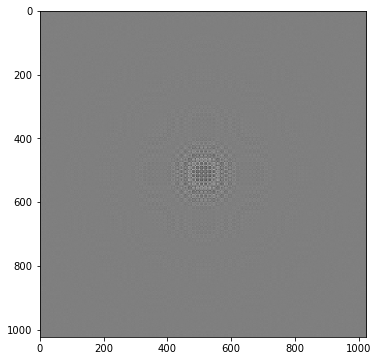

In [16]:

fig, ax = plt.subplots()
ax.imshow(np.real(U2), cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

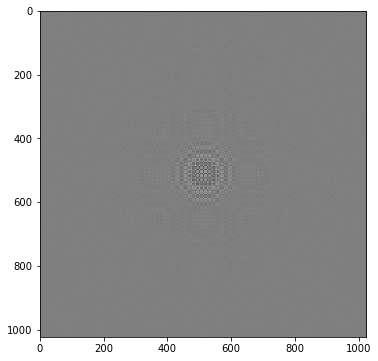

In [17]:

fig, ax = plt.subplots()
ax.imshow(np.imag(U2), cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

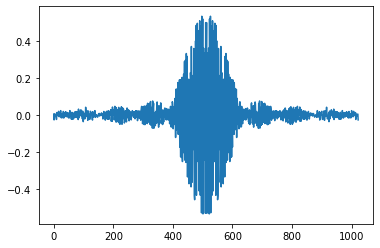

In [18]:
plt.plot(np.real(U2)[math.floor(N/2)])

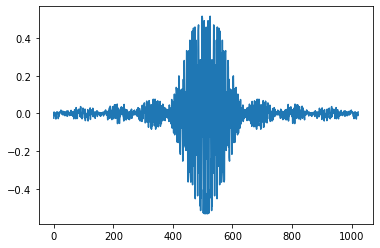

In [19]:
plt.plot(np.imag(U2)[math.floor(N/2)])

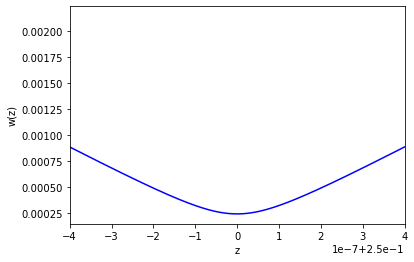

In [20]:
def A(z):
    return 1
def B(z):
    return z
def C(z):
    return 0
def D(z):
    return 1
z0 = 0.0
3.141592653589793638
2.718281828459045

Z_R = np.pi * w0**2 / λ

#def q(z):
#    return (A(z) * (z0 - 1j * Z_R) + B(z) ) / (C(z) * (z0 - 1j) + D(z))

def q(z):
    mat1 = 0
    if z < z0:
        mat1 = np.matrix([[1, z], [0, 1]]) 
    
    else:
#    elif z < z2 + z1:
        mat1 = np.matrix([[1, z-z0], [0, 1]]) 
        mat1 = mat1 @ np.matrix([[1, 0], [-1/f, 1]]) 
        mat1 = mat1 @ np.matrix([[1, z0], [0, 1]]) 
    """
    else:
        mat1 = np.matrix([[1, z-(z1+z2)], [0, 1]]) 
        mat1 = mat1 @ np.matrix([[1, 0], [-1/f2, 1]]) 
        mat1 = mat1 @ np.matrix([[1, z2], [0, 1]])
        mat1 = mat1 @ np.matrix([[1, 0], [-1/f1, 1]]) 
        mat1 = mat1 @ np.matrix([[1, z1], [0, 1]]) 
    """     
    A = mat1[0,0]
    B = mat1[0,1]
    C = mat1[1,0]
    D = mat1[1,1]
    return (A * (z0 - 1j * Z_R) + B ) / ( C * (z0 - 1j * Z_R)  + D )
def w(z):
    return math.sqrt(-λ * q(z).imag * (1 + (q(z).real / q(z).imag)**2) )

center = 0.25
div = 10**-6
z = np.linspace(center - div, center + div,5000)
wz = []
for i in z:
    wz.append(w(i))
plt.plot(z, wz, color='b')
#plt.plot(z, [-i for i in wz], color='b')

#plt.hlines(y = D0 / 2 , xmin=fiberz, xmax=fiberz + 0.5, color='k')
#plt.hlines(y = -D0 / 2 , xmin=fiberz, xmax=fiberz + 0.5, color='k')
#plt.vlines(x = fiberz , ymin=-D0 / 2, ymax=D0 / 2, color='k')
#plt.axvline(x = z1, color='k', linestyle='dotted')
#plt.axvline(x = z1+z2, color='k', linestyle='dotted')
#plt.axhline(y = 0, color='k', linestyle='dotted')
plt.xlim(center - div*0.4, center + div*0.4)
plt.xlabel("z")
plt.ylabel("w(z)")

plt.show()



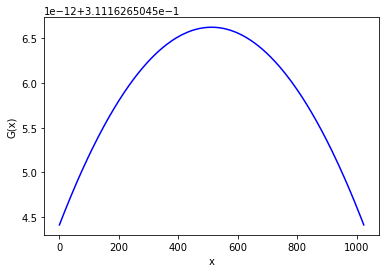

In [21]:
maxI1 = np.max(I1)
def G(x):
    return maxI1  * np.exp(-2 * ( ( (x - N/2 ) * dx )**2 ) / w(L1)**2) 

x = np.linspace(0, N, 1 * N)
Gx = []
for i in x:
    Gx.append(G(i))
plt.plot(x, Gx, color='b')
#plt.plot(z, [-i for i in wz], color='b')

#plt.hlines(y = D0 / 2 , xmin=fiberz, xmax=fiberz + 0.5, color='k')
#plt.hlines(y = -D0 / 2 , xmin=fiberz, xmax=fiberz + 0.5, color='k')
#plt.vlines(x = fiberz , ymin=-D0 / 2, ymax=D0 / 2, color='k')
#plt.axvline(x = z1, color='k', linestyle='dotted')
#plt.axvline(x = z1+z2, color='k', linestyle='dotted')
#plt.axhline(y = 0, color='k', linestyle='dotted')
plt.xlabel("x")
plt.ylabel("G(x)")

plt.show()


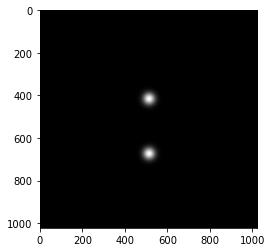

In [3]:
def E1(x, y):
    if (x + r0*2.5)**2 + y**2  < r0**2:
        return 1
    
    if (x - r0*2.5)**2 + y**2  < r0**2:
        return 1
    return 0
def k_(x, y):
    return np.exp((-2) * ((x)**(2) + (y)**(2)) / ((w0)**(2)))
def E1_k(x, y):
    if(x < N/2):
        return k_(x + r0*2.5, y)
    if(x > N/2):
        return k_(N/2 - x + r0*2.5, y)
    return 0

U0_var = [[ E1_k(X[i], Y[j]) for j in range(N-1)] for i in range(N-1)]
plt.imshow(U0_var, cmap='gray')

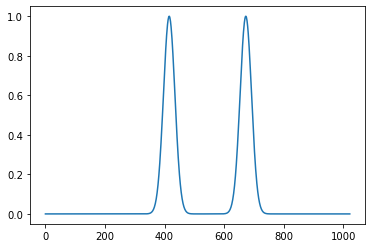

In [23]:
plt.plot(np.transpose(U0_var)[math.floor(N/2)]) 

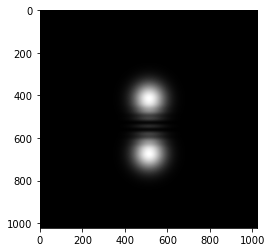

In [10]:
H_0_L1 = np.transpose(H0_L1)
F_0 = np.fft.fft2(U0_var)

A_0 = [[F_0[i][j] * H_0_L1[i][j] for j in range(N-1)] for i in range(N-1)]
U_1 = np.fft.ifft2(A_0)
I_1 = [[np.abs(U_1[i][j])**2 for j in range(N-1)] for i in range(N-1)]

plt.imshow(I_1, cmap='gray')

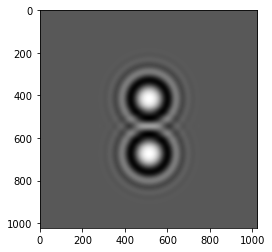

In [25]:
plt.imshow(np.imag(U_1), cmap='gray')

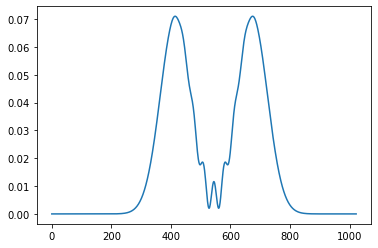

In [26]:
plt.plot(np.transpose(I_1)[math.floor(N/2)])

In [11]:
def B(x, y):
    return np.exp(1j * k / (2 * f) * (x**2 + y **2) )

U1_2 = [[U_1[i][j] * B(X[i], Y[j]) for j in range(N-1)] for i in range(N-1)]
H1_f = H0(f)
F1 = np.fft.fft2(U1_2)
A1 = [[F1[i][j] * H1_f[i][j] for j in range(N-1)] for i in range(N-1)]
U2 = np.fft.ifft2(A1)
I2 = [[np.abs(U2[i][j])**2 for j in range(N-1)] for i in range(N-1)]

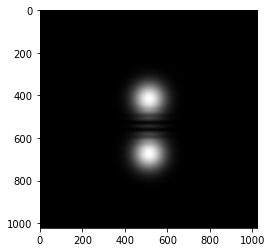

In [12]:
fig, ax = plt.subplots()
ax.imshow(I2, cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
#fig.set_figwidth(6)    #  ширина и
#fig.set_figheight(6)    #  высота "Figure"

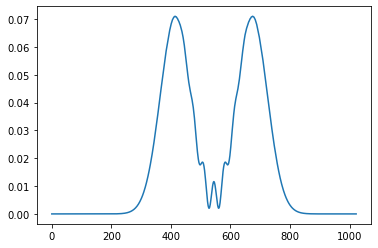

In [29]:
plt.plot(np.transpose(I2)[math.floor(N/2)])

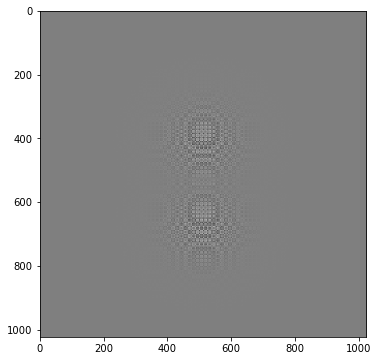

In [30]:

fig, ax = plt.subplots()
ax.imshow(np.real(U2), cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

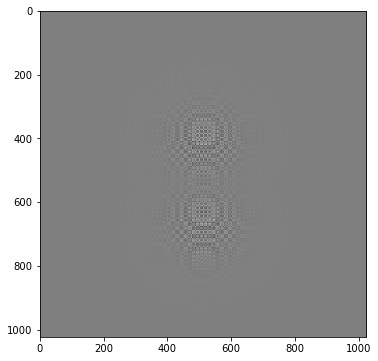

In [31]:

fig, ax = plt.subplots()
ax.imshow(np.imag(U2), cmap='gray')
#ax.imshow(I2 * np.transpose(I2))
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

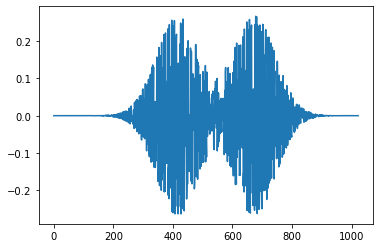

In [32]:
plt.plot(np.transpose(np.real(U2))[math.floor(N/2)])

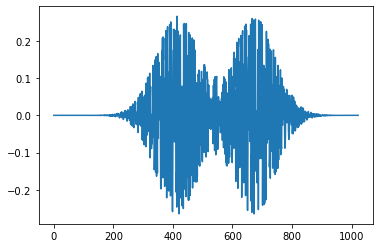

In [33]:
plt.plot(np.transpose(np.imag(U2))[math.floor(N/2)])

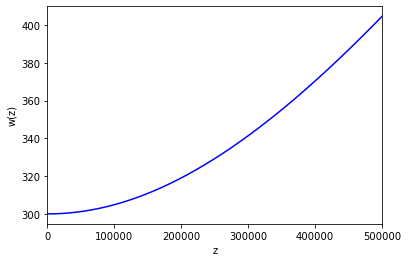

In [34]:
def A(z):
    return 1
def B(z):
    return z
def C(z):
    return 0
def D(z):
    return 1
z0 = 0.0
3.141592653589793638
2.718281828459045

Z_R = np.pi * w0**2 / λ

def q(z):
    return (A(z) * (z0 - 1j * Z_R) + B(z) ) / (C(z) * (z0 - 1j) + D(z))

def w(z):
    return math.sqrt(-λ * q(z).imag * (1 + (q(z).real / q(z).imag)**2) / np.pi)


z = np.linspace(0, 5*10**5,10000)
wz = []
for i in z:
    wz.append(w(i))
plt.plot(z, wz, color='b')
plt.xlim(0, 5*10**5)
plt.xlabel("z")
plt.ylabel("w(z)")

plt.show()



In [35]:
print(w(L1))

620.5798396547914
